## Heat transfer in water tube model

### 1. convection-diffusion equation 

The convection–diffusion equation is a combination of the diffusion and convection (advection) equations, and describes physical phenomena where particles, energy, or other physical quantities are transferred inside a physical system due to two processes: diffusion and convection. Depending on context, the same equation can be called the advection–diffusion equation, drift–diffusion equation, or (generic) scalar transport equation.

The general equation is:
\begin{equation}
\frac{\partial c}{\partial t}= \nabla(D\nabla c)-\nabla(vc) + R
\end{equation}

where:

c is the variable of interest (species concentration for mass transfer, temperature for heat transfer).

D is the diffusivity (also called diffusion coefficient), such as mass diffusivity for particle motion or thermal diffusivity for heat transport.

v is the velocity field that the quantity is moving with. It is function of time and space.

R describes "sources" or "sinks" of the quantity c. 

## 2. Water tube model 

In order to figure out the temperature distribution in water tube model in any given time, the convection-diffusion equation mentioned above can be converted into following form:
\begin{equation}
\frac{\partial T}{\partial t}= \nabla(\alpha\nabla T)-\nabla(vT) + \frac{Q(t)}{c\rho}
\end{equation}
where:

T is the temperature in particular case of heat transfer otherwise it is the variable of interest

c is the specific heat

ρ  is mass density

α is the diffusion coefficient(thermal diffusivity)

Q(t) is source term represents capacity of internal sources

As this is a 2-D domained model, the thermal diffusivity and the velocity are constants, and there is no heat source inside. The model can be simplified into:
$$
\frac{\partial T}{\partial t} = \alpha( \frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2})-v(\frac{\partial T}{\partial x}+\frac{\partial T}{\partial y})
$$

## 3. Implicit discretization

An implicit discretization will evaluate the spatial derivatives at the next time level, $t^{n+1}$ , using the unknown values of the solution variable. For the 2D heat equation with central difference in space, that is written as:

\begin{eqnarray}
\frac{T^{n+1}_{i,j} - T^n_{i,j}}{\Delta t} = \alpha &\left( \frac{T^{n+1}_{i+1, j} - 2T^{n+1}_{i,j} + T^{n+1}_{i-1,j}}{\Delta x^2} + \frac{T^{n+1}_{i, j+1} - 2T^{n+1}_{i,j} + T^{n+1}_{i,j-1}}{\Delta y^2}\right) - v&\left(\frac{T^{n+1}_{i+1, j} - T^{n+1}_{i-1,j}}{2\Delta x} + \frac{T^{n+1}_{i, j+1} - T^{n+1}_{i,j-1}}{2\Delta y}\right)
\end{eqnarray}

If we put the unkown T to the right side of the equation:

\begin{eqnarray}
T^n_{i,j} = \left(1 + 2\frac{\alpha\Delta t}{\Delta x^2} + 2\frac{\alpha\Delta t}{\Delta y^2}\right) T^{n+1}_{i,j} - \left(\frac{\alpha\Delta t}{\Delta x^2}-\frac{v_{x}\Delta t}{2\Delta x}\right)T^{n+1}_{i+1,j}- \left(\frac{\alpha\Delta t}{\Delta y^2}-\frac{v_{y}\Delta t}{2\Delta y}\right)T^{n+1}_{i,j+1}-\left(\frac{\alpha\Delta t}{\Delta x^2}+\frac{v_{x}\Delta t}{2\Delta x}\right)T^{n+1}_{i-1,j}-\left(\frac{\alpha\Delta t}{\Delta y^2}+\frac{v_{y}\Delta t}{2\Delta y}\right)T^{n+1}_{i,j-1}
\end{eqnarray}

Now set:

$$P1=\frac{\alpha\Delta t}{\Delta x^2}-\frac{v_{x}\Delta t}{2\Delta x}$$
$$Q1=\frac{\alpha\Delta t}{\Delta y^2}-\frac{v_{y}\Delta t}{2\Delta y}$$
$$P2=\frac{\alpha\Delta t}{\Delta x^2}+\frac{v_{x}\Delta t}{2\Delta x}$$
$$Q2=\frac{\alpha\Delta t}{\Delta y^2}+\frac{v_{y}\Delta t}{2\Delta y}$$
$$M=\frac{\alpha\Delta t}{\Delta x^2} + \frac{\alpha\Delta t}{\Delta y^2}$$

then can get:
$$(1+2M)T^{n+1}_{i,j} -P1T^{n+1}_{i+1,j}- P2T^{n+1}_{i-1,j}-Q1T^{n+1}_{i,j+1} -Q2T^{n+1}_{i,j-1}=T^n_{i,j}$$

**For the stability criteria**

$$max(\Delta x,\Delta y)<\frac{2\alpha}{v}$$

$$\Delta t<\frac{(min(\Delta x,\Delta y))^2}{\alpha ^2}$$

## 4. Problem set

<img src="./figures/1512963959082.jpg" width="400px">


In this model, I take a short period of water tube cross section and use the boundary conditions above.
For the left and right hand sides, there are dirichlet boundary conditions, for the top and bottom there are neumann boundary conditions and there is a water flow from left to right at the velocity of v.

Before constructing the coefficient matrix, boundary conditions have to be considered.

**For the bottom**
the boundary condition has finite-difference approximation of 

$$
\frac{T^{n+1}_{i,1} - T^{n+1}_{i,0}}{\delta} = q
$$

so the equation can be written as :


$$(1+2M-Q2)T^{n+1}_{i,j} -P1T^{n+1}_{i+1,j}- P2T^{n+1}_{i-1,j}-Q1T^{n+1}_{i,j+1} =T^n_{i,j}-Q2q\Delta y$$

**For the top**

Like for the bottom boundary, the equation for j=ny-2  (interior points adjacent to the top boundary) uses known values from j=ny-2 , and we will put that on the right-hand side:

$$(1+2M-Q1)T^{n+1}_{i,j} -P1T^{n+1}_{i+1,j}- P2T^{n+1}_{i-1,j}-Q2T^{n+1}_{i,j-1} =T^n_{i,j}+Q1q\Delta y$$

**For the left**

The equation for  i=1  (interior points adjacent to the bottom boundary) uses values from i=0 , which are known. Let's put that on the right-hand side of the equation. We get this equation for all points across the  x -axis that are adjacent to the bottom boundary:

$$(1+2M)T^{n+1}_{i,j} -P1T^{n+1}_{i+1,j}-Q1T^{n+1}_{i,j+1} -Q2T^{n+1}_{i,j-1}=T^n_{i,j}+ P2T^{n+1}_{i-1,j}$$


**For the right**

similar as the left bottom, we can get:
$$(1+2M)T^{n+1}_{i,j} -P2T^{n+1}_{i-1,j}-Q1T^{n+1}_{i,j+1} -Q2T^{n+1}_{i,j-1}=T^n_{i,j}+ P1T^{n+1}_{i+1,j}$$

**For the left-bottom**

combination of left and bottom boundary, we can get:

$$(1+2M-Q2)T^{n+1}_{i,j} -P1T^{n+1}_{i+1,j}-Q1T^{n+1}_{i,j+1}=T^n_{i,j}+ P2T^{n+1}_{i-1,j}-Q2q\Delta y$$


**For the left-top**

combination of left and top boundary, we can get:

$$(1+2M-Q1)T^{n+1}_{i,j} -P1T^{n+1}_{i+1,j}-Q2T^{n+1}_{i,j-1}=T^n_{i,j}+ P2T^{n+1}_{i-1,j}+Q1q\Delta y$$


**For the right-bottom**

combination of right and bottom boundary, we can get:

$$(1+2M-Q2)T^{n+1}_{i,j} -P2T^{n+1}_{i-1,j}-Q1T^{n+1}_{i,j+1}=T^n_{i,j}+ P1T^{n+1}_{i+1,j}-Q2q\Delta y$$


**For the right-top**

combination of right and top boundary, we can get:

$$(1+2M-Q1)T^{n+1}_{i,j} -P2T^{n+1}_{i-1,j}-Q2T^{n+1}_{i,j-1}=T^n_{i,j}+ P1T^{n+1}_{i+1,j}+Q1q\Delta y$$




In [1]:
import numpy 
from scipy.linalg import solve
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
from mpl_toolkits.mplot3d import Axes3D
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def CoMatrix(nx, ny, M, P1, Q1, P2, Q2):
    """ Generate implicit matrix for 2D heat equation with Dirichlet in left and right and Neumann in top and bottom
    

        
    Returns:
    -------
    A: 2D array of floats
        Matrix of implicit 2D heat equation
    """
    
    A = numpy.zeros(((nx-2)*(ny-2),(nx-2)*(ny-2)))
    
    row_number = 0 # row counter
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            
            # Corners
            if i==1 and j==1: # Bottom left corner (Neumann down and Dirichlet left)
                A[row_number,row_number] = 1+2*M-Q2 # Set diagonal
                A[row_number,row_number+1] = -P1      # fetch i+1
                A[row_number,row_number+nx-2] = -Q1   # fetch j+1
                
            elif i==nx-2 and j==1: # Bottom right corner (Neumann down, Dirichlet right)
                A[row_number,row_number] = 1+2*M-Q2 # Set diagonal
                A[row_number,row_number-1] = -P2      # Fetch i-1
                A[row_number,row_number+nx-2] = -Q1   # fetch j+1
                
            elif i==1 and j==ny-2: # Top left corner (Dirichlet left, Neumann top)
                A[row_number,row_number] = 1+2*M-Q1   # Set diagonal
                A[row_number,row_number+1] = -P1        # fetch i+1
                A[row_number,row_number-(nx-2)] = -Q2  # fetch j-1
                
            elif i==nx-2 and j==ny-2: # Top right corner (Neumann up and Dirichlet right)
                A[row_number,row_number] = 1+2*M-Q1   # Set diagonal
                A[row_number,row_number-1] = -P2        # Fetch i-1
                A[row_number,row_number-(nx-2)] = -Q2   # fetch j-1
              
            # Sides
            elif i==1: # Left boundary (Dirichlet)
                A[row_number,row_number] = 1+2*M # Set diagonal
                A[row_number,row_number+1] = -P1      # fetch i+1
                A[row_number,row_number+nx-2] = -Q1   # fetch j+1
                A[row_number,row_number-(nx-2)] = -Q2 # fetch j-1
            
            elif i==nx-2: # Right boundary (Dirichlet)
                A[row_number,row_number] = 1+2*M # Set diagonal
                A[row_number,row_number-1] = -P2      # Fetch i-1
                A[row_number,row_number+nx-2] = -Q1   # fetch j+1
                A[row_number,row_number-(nx-2)] = -Q2 # fetch j-1
                
            elif j==1: # Bottom boundary (Neumann)
                A[row_number,row_number] = 1+2*M # Set diagonal
                A[row_number,row_number+1] = -P1      # fetch i+1
                A[row_number,row_number-1] = -P2      # fetch i-1
                A[row_number,row_number+nx-2] = -Q1   # fetch j+1
                
            elif j==ny-2: # Top boundary (Neumann)
                A[row_number,row_number] = 1+2*M # Set diagonal
                A[row_number,row_number+1] = -P1      # fetch i+1
                A[row_number,row_number-1] = -P2      # fetch i-1
                A[row_number,row_number-(nx-2)] = -Q2 # fetch j-1
                
            # Interior points
            else:
                A[row_number,row_number] = 1+2*M # Set diagonal
                A[row_number,row_number+1] = -P1      # fetch i+1
                A[row_number,row_number-1] = -P2      # fetch i-1
                A[row_number,row_number+nx-2] = -Q1   # fetch j+1
                A[row_number,row_number-(nx-2)] = -Q2 # fetch j-1
                
            row_number += 1 # Jump to next row of the matrix!
    
    return A           

In [3]:
def RHSMatrix(nx, ny, P1,P2, T, T1,T2):
    """ Generates right-hand side for 2D implicit heat equation with Dirichlet in right and left and Neumann in top 
    and bottom
        Assumes dx=dy, Neumann BCs q = 0, and constant Dirichlet BCs
        

        
        Returns:
        -------
        RHS  : array of float
            Right hand side of 2D implicit heat equation
    """
    RHS = numpy.zeros((nx-2)*(ny-2))
    
    row_number = 0 # row counter
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            
            # Corners
            if i==1 and j==1: # Bottom left corner (Neumann down and Dirichlet left)
                RHS[row_number] = T[j,i] + P2*T1-Q2*q*dy 
                
            elif i==nx-2 and j==1: # Bottom right corner (Neumann down, Dirichlet right)
                RHS[row_number] = T[j,i] + P1*T2-Q2*q*dy 
                           
            elif i==1 and j==ny-2: # Top left corner (Dirichlet left, Neumann top)
                RHS[row_number] = T[j,i] + P2*T1+Q1*q*dx
                
            elif i==nx-2 and j==ny-2: # Top right corner (Neumann up and Dirichlet right)
                RHS[row_number] = T[j,i] + P1*T2+Q1*q*dx
              
            # Sides
            elif i==1: # Left boundary (Dirichlet)
                RHS[row_number] = T[j,i] + P2*T1 
            
            elif i==nx-2: # Right boundary (Dirichlet)
                RHS[row_number] = T[j,i] + P1*T2 
                
            elif j==1: # Bottom boundary (Neumann)
                RHS[row_number] = T[j,i] -Q2*q*dy
                
            elif j==ny-2: # Top boundary (Neumann)
                RHS[row_number] = T[j,i] +Q1*q*dy
                
            # Interior points
            else:
                RHS[row_number] = T[j,i]  
                
            row_number += 1 # Jump to next row!
    
    return RHS

In [4]:
def map_1Dto2D(nx, ny, T_1D, T1,T2):
    """ Takes temperatures of solution of linear system, stored in 1D, 
    and puts them in a 2D array with the BCs
    Valid for constant Dirichlet bottom and left, and Neumann with zero 
    flux top and right
        
            
    Returns:
    -------
        T: 2D array of float
            Temperature stored in 2D array with BCs
    """
    T = numpy.zeros((ny,nx))
    
    row_number = 0
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            T[j,i] = T_1D[row_number]
            row_number += 1
    # Dirichlet BC
    T[:,0] = T1
    T[:,nx-1] = T2
    #Neumann BC
    #T[-1,:] = T[-2,:]
    #T[:,-1] = T[:,-2]
    T[-1,:] = T[-2,:]
    #T[:,-1] = T[:,-2]
    T[0,:] =T[1,:]
    #T[:,0] =T[:,1]
    return T

In [5]:
def btcs_2D(T, A, nt, P1,P2,Q1,Q2, T1,T2, nx, ny, dt):
    """ Advances diffusion equation in time with backward Euler
   
    Parameters:
    ----------
    T: 2D array of float
        initial temperature profile
    A: 2D array of float
        Matrix with discretized diffusion equation
    nt: int
        number of time steps

    T_bc : float 
        Dirichlet BC temperature
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    dt   : float
        Time step size
        
    Returns:
    -------
    T: 2D array of floats
        temperature profile after nt time steps
    """
 
    
    for t in range(nt):
        Tn = T.copy()
        b = RHSMatrix(nx, ny, P1,P2, T, T1,T2)
        # Use numpy.linalg.solve
        T_interior = solve(A,b)
        T = map_1Dto2D(nx, ny, T_interior, T1,T2)
        
        
    return T

In [6]:
"""parameter set:
 termal diffusivity = 1.4e^-4
 
 nx=ny=51
 
 the model section has a dimension of 10✖️10cm
 
 the velocity v= 0.02m/s, and only has x direction
 
 the neumann boundary condition parameter q=0
 
 dirichlet boundary condition parameter T1=60 T2=25
 """
alpha = 1.4*10**(-4)
q=0

L = 0.1
H = 0.1

nx = 51
ny = 51
nt = 50
vx=0.02
vy=0
dx = L/(nx-1)
dy = H/(ny-1)
dt=0.1
P1=alpha*dt/dx**2-vx*dt/(2*dx)
Q1=alpha*dt/dy**2-vy*dt/(2*dy)
P2=alpha*dt/dx**2+vx*dt/(2*dx)
Q2=alpha*dt/dy**2+vy*dt/(2*dy)
M=(alpha*dt/dx**2+alpha*dt/dy**2)

x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)


        

T1 = 60
T2 = 25

Ti = numpy.ones((ny, nx))*20
Ti[:,0]= T1
Ti[:,nx-1] = T2

In [7]:
A = CoMatrix(nx, ny, M, P1, Q1, P2, Q2)

In [8]:
##dt = dx**2/(2*alpha)
T = btcs_2D(Ti.copy(), A, nt, P1,P2,Q1,Q2, T1,T2, nx, ny, dt)
T

array([[ 60.        ,  47.86988517,  27.81249944, ...,   7.65566298,
         15.82265726,  25.        ],
       [ 60.        ,  47.86988517,  27.81249944, ...,   7.65566298,
         15.82265726,  25.        ],
       [ 60.        ,  51.1989535 ,  40.16345455, ...,  11.5830401 ,
         17.29289328,  25.        ],
       ..., 
       [ 60.        ,  51.1989535 ,  40.16345455, ...,  11.5830401 ,
         17.29289328,  25.        ],
       [ 60.        ,  47.86988517,  27.81249944, ...,   7.65566298,
         15.82265726,  25.        ],
       [ 60.        ,  47.86988517,  27.81249944, ...,   7.65566298,
         15.82265726,  25.        ]])

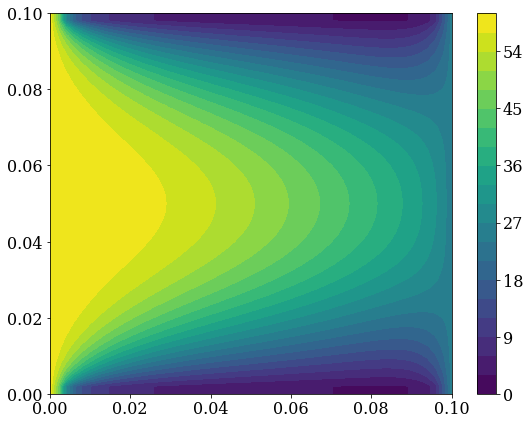

In [9]:
pyplot.figure(figsize=(9,7))
pyplot.contourf(x,y,T,20, cmap=cm.viridis);
pyplot.colorbar();

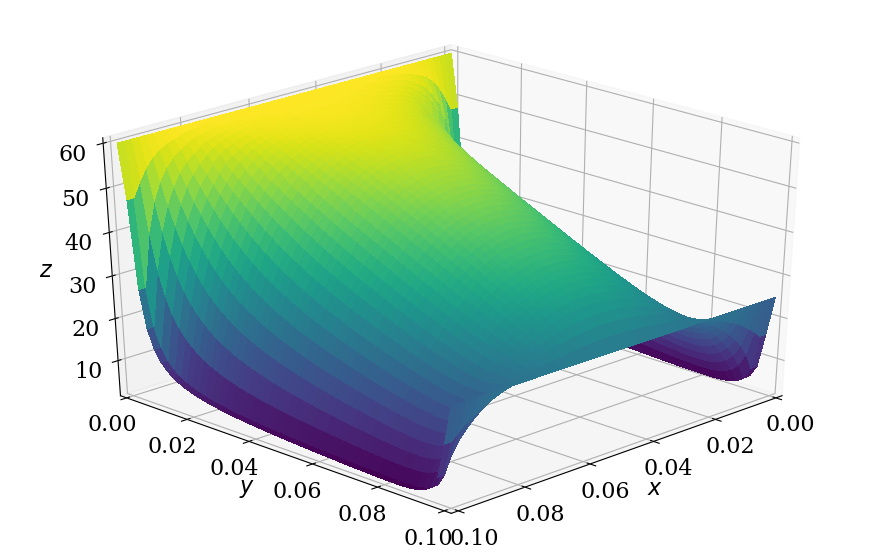

In [10]:
def plot_3D(x, y, p):
    '''Creates 3D plot with appropriate limits and viewing angle
    
    Parameters:
    ----------
    x: array of float
        nodal coordinates in x
    y: array of float
        nodal coordinates in y
    p: 2D array of float
        calculated potential field
    
    '''
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(y,x)
    surf = ax.plot_surface(Y,X,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,0.1)
    ax.set_ylim(0.,0.1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)
plot_3D(x,y,T)


**Now we change the value and direction of v**, and we can see different plot

set:
$$vx=0.02, vy=0.01$$

and keeping other parameter the same

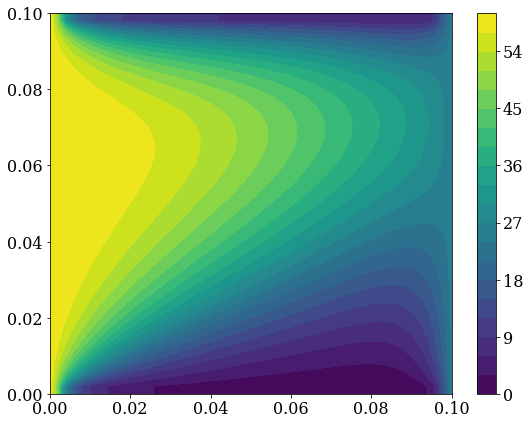

In [11]:

vx=0.02
vy=0.01

P1=alpha*dt/dx**2-vx*dt/(2*dx)
Q1=alpha*dt/dy**2-vy*dt/(2*dy)
P2=alpha*dt/dx**2+vx*dt/(2*dx)
Q2=alpha*dt/dy**2+vy*dt/(2*dy)
M=(alpha*dt/dx**2+alpha*dt/dy**2)

A = CoMatrix(nx, ny, M, P1, Q1, P2, Q2)
T = btcs_2D(Ti.copy(), A, nt, P1,P2,Q1,Q2, T1,T2, nx, ny, dt)
T
pyplot.figure(figsize=(9,7))
pyplot.contourf(x,y,T,20, cmap=cm.viridis);
pyplot.colorbar();

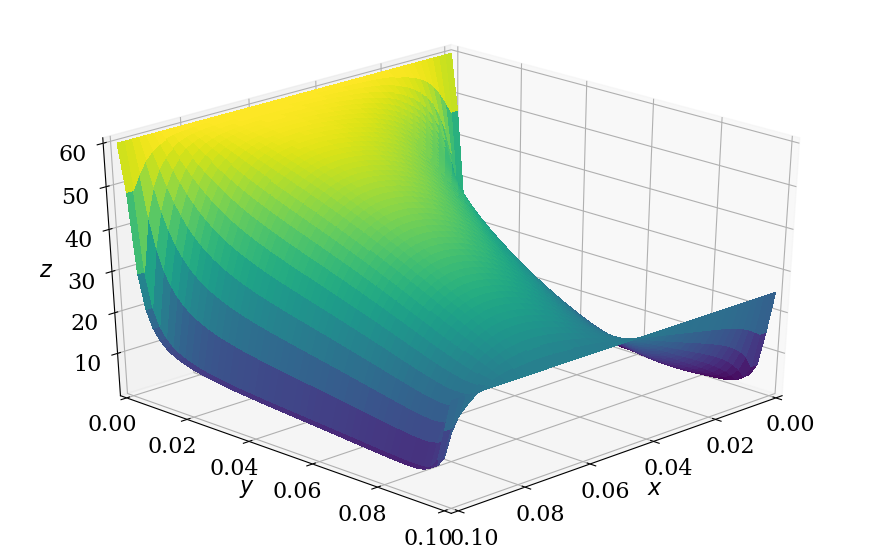

In [12]:
plot_3D(x,y,T)

**We can see that the plots are conformed with realities**